# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file= "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


C:\Users\nosha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
# url should look like:
# url = https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
base_url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "metric"

base_url = f"{base_url}appid={api_key}&units={units}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = []

print("Beginning Data Retrieval")
print("----------------------------")

#________________________________________________________________________________________

record_count = 1
set_count = 1
# Looping

for index, city in enumerate(cities):
    # Group cities in sets os 50 for loggin purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # log the URL and set number
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        
        # Extract out the max temp, humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list, by making a dictionary
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date              
        })
        
    except (KeyError):
        print("City Not Found. Skipping....")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        

Beginning Data Retrieval
----------------------------
Processing Record 1 of set 1 | new norfolk
Processing Record 2 of set 1 | darnah
Processing Record 3 of set 1 | busselton
Processing Record 4 of set 1 | sitka
Processing Record 5 of set 1 | sao filipe
Processing Record 6 of set 1 | vaini
Processing Record 7 of set 1 | puerto ayora
Processing Record 8 of set 1 | canico
Processing Record 9 of set 1 | punta arenas
Processing Record 10 of set 1 | verkhnyaya inta
Processing Record 11 of set 1 | chippewa falls
Processing Record 12 of set 1 | tabiauea
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 13 of set 1 | wajima
Processing Record 14 of set 1 | hilo
Processing Record 15 of set 1 | ushuaia
Processing Record 16 of set 1 | mahadday weyne
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 17 of set 1 | khandbari
Processing Record 18 of set 1 | tuatape

Processing Record 21 of set 4 | poum
Processing Record 22 of set 4 | warqla
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 23 of set 4 | san luis
Processing Record 24 of set 4 | kolyvan
Processing Record 25 of set 4 | turukhansk
Processing Record 26 of set 4 | lebu
Processing Record 27 of set 4 | prado
Processing Record 28 of set 4 | niquero
Processing Record 29 of set 4 | illoqqortoormiut
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 30 of set 4 | tuktoyaktuk
Processing Record 31 of set 4 | luderitz
Processing Record 32 of set 4 | gazojak
Processing Record 33 of set 4 | tulun
Processing Record 34 of set 4 | provideniya
Processing Record 35 of set 4 | broken hill
Processing Record 36 of set 4 | mantua
Processing Record 37 of set 4 | atar
Processing Record 38 of set 4 | grand gaube
Processing Record 39 of set 4 | henties bay
Processing Record 4

Processing Record 41 of set 7 | asau
Processing Record 42 of set 7 | kruisfontein
Processing Record 43 of set 7 | tura
Processing Record 44 of set 7 | konstantinovka
Processing Record 45 of set 7 | byron bay
Processing Record 46 of set 7 | greenville
Processing Record 47 of set 7 | arnes
Processing Record 48 of set 7 | okhotsk
Processing Record 49 of set 7 | yatou
Processing Record 0 of set 8 | halifax
Processing Record 1 of set 8 | arrecife
Processing Record 2 of set 8 | parkes
Processing Record 3 of set 8 | chapada dos guimaraes
Processing Record 4 of set 8 | masyaf
Processing Record 5 of set 8 | necochea
Processing Record 6 of set 8 | killybegs
Processing Record 7 of set 8 | hambantota
Processing Record 8 of set 8 | marquette
Processing Record 9 of set 8 | mogadishu
Processing Record 10 of set 8 | yulara
Processing Record 11 of set 8 | ginir
Processing Record 12 of set 8 | bud
Processing Record 13 of set 8 | kelamangalam
Processing Record 14 of set 8 | nicoya
Processing Record 15 of

City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 12 of set 11 | mandalgovi
Processing Record 13 of set 11 | pervomayskoye
Processing Record 14 of set 11 | kimberley
Processing Record 15 of set 11 | newport
Processing Record 16 of set 11 | sayyan
Processing Record 17 of set 11 | puerto escondido
Processing Record 18 of set 11 | aswan
Processing Record 19 of set 11 | agadez
Processing Record 20 of set 11 | saint-augustin
Processing Record 21 of set 11 | kouqian
Processing Record 22 of set 11 | mazatlan
Processing Record 23 of set 11 | oil city
Processing Record 24 of set 11 | saint-pierre
Processing Record 25 of set 11 | nakhon phanom
Processing Record 26 of set 11 | kulhudhuffushi
Processing Record 27 of set 11 | faya
Processing Record 28 of set 11 | meulaboh
Processing Record 29 of set 11 | megalopoli
Processing Record 30 of set 11 | sinnar
Processing Record 31 of set 11 | srednekolymsk
Processing Record 32 of set 11

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]


# Exporting data to csv file for vacation challenge
city_data_df.to_csv("city_list.csv")
#, index_label="City_ID")

city_data_df.count()


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Windspeed     561
Country       561
Date          561
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,new norfolk,-42.7826,147.0587,10.72,83,100,0.72,AU,1660222337
1,darnah,32.7670,22.6367,28.77,61,0,9.93,LY,1660222337
2,busselton,-33.6500,115.3333,11.68,79,1,3.11,AU,1660222337
3,sitka,57.0531,-135.3300,13.94,88,40,0.00,US,1660222337
4,sao filipe,14.8961,-24.4956,26.32,71,0,6.66,CV,1660222338


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
chosen_humidity = city_data_df.loc[city_data_df['Humidity'] < 101,:]


In [8]:
#  Get the indices of cities that have humidity over 100%.
chosen_humidity['Humidity']>100

0      False
1      False
2      False
3      False
4      False
       ...  
556    False
557    False
558    False
559    False
560    False
Name: Humidity, Length: 561, dtype: bool

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

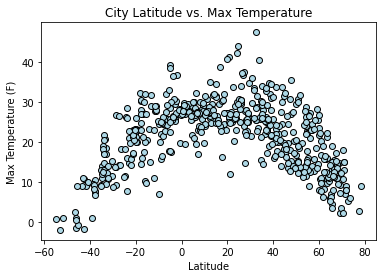

In [24]:
x_values = chosen_humidity['Lat']
y_values = chosen_humidity['Max Temp']
plt.scatter(x_values, y_values, edgecolors = 'black', facecolors = 'lightblue')


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

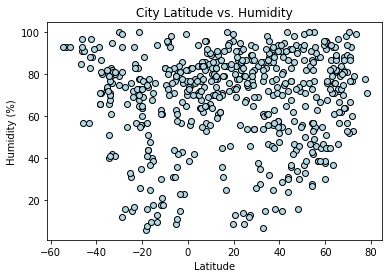

In [25]:
x_values = chosen_humidity['Lat']
y_values = chosen_humidity['Humidity']
plt.scatter(x_values, y_values, edgecolors = 'black', facecolors = 'lightblue')


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

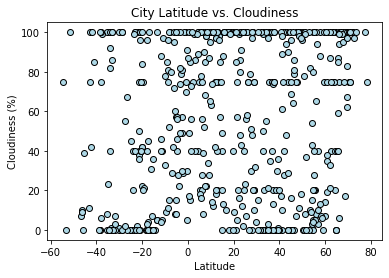

In [26]:
x_values = chosen_humidity['Lat']
y_values = chosen_humidity['Cloudiness']
plt.scatter(x_values, y_values, edgecolors = 'black', facecolors = 'lightblue')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

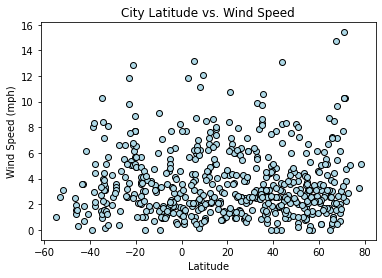

In [27]:
x_values = chosen_humidity['Lat']
y_values = chosen_humidity['Windspeed']
plt.scatter(x_values, y_values, edgecolors = 'black', facecolors = 'lightblue')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [32]:
# latiutde of + is the North of the equator and - is Sounth
north = chosen_humidity.loc[city_data_df["Lat"] >0, :]
north

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,darnah,32.7670,22.6367,28.77,61,0,9.93,LY,1660222337
3,sitka,57.0531,-135.3300,13.94,88,40,0.00,US,1660222337
4,sao filipe,14.8961,-24.4956,26.32,71,0,6.66,CV,1660222338
7,canico,32.6333,-16.8500,25.56,77,40,3.09,PT,1660222338
9,verkhnyaya inta,65.9811,60.3094,15.06,72,94,1.02,RU,1660222338
...,...,...,...,...,...,...,...,...,...
552,lagoa,39.0500,-27.9833,21.89,74,30,2.67,PT,1660222445
553,zabid,14.1951,43.3152,32.01,62,85,5.55,YE,1660222445
555,ponnani,10.7670,75.9252,27.62,86,100,3.90,IN,1660222446
558,ville-marie,47.3335,-79.4330,12.88,73,7,4.32,CA,1660222447


In [33]:
south = chosen_humidity.loc[city_data_df["Lat"] <=0, :]
south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,new norfolk,-42.7826,147.0587,10.72,83,100,0.72,AU,1660222337
2,busselton,-33.6500,115.3333,11.68,79,1,3.11,AU,1660222337
5,vaini,-21.2000,-175.2000,21.09,100,75,5.14,TO,1660222338
6,puerto ayora,-0.7393,-90.3518,19.75,99,100,1.79,EC,1660222338
8,punta arenas,-53.1500,-70.9167,-1.99,93,0,2.57,CL,1660222338
...,...,...,...,...,...,...,...,...,...
551,lagunas,-5.2269,-75.6753,22.50,79,8,2.14,PE,1660222445
554,jacareacanga,-6.2222,-57.7528,29.32,44,72,1.45,BR,1660222446
556,bagotville,-28.9833,153.4167,13.81,99,100,2.90,AU,1660222446
557,kuruman,-27.4524,23.4325,26.66,16,2,6.60,ZA,1660222446


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
x_values = north['Lat']
y_values = north['Max Temp']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

##

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')


The r-value is: 0.4408306127486135


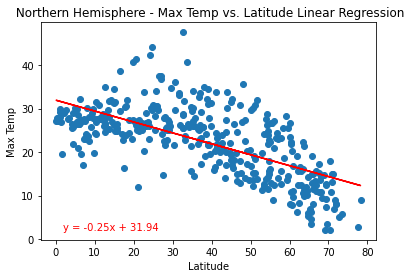

In [59]:
#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title(' Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(2,2), color='red')


#plt.savefig('output_data/north_lat_vs_temp.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [58]:
x_values2 = south['Lat']
y_values2 = south['Max Temp']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)

regress_values2 = x_values2 * slope + intercept

##

line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')


The r-value is: 0.6217014524391586


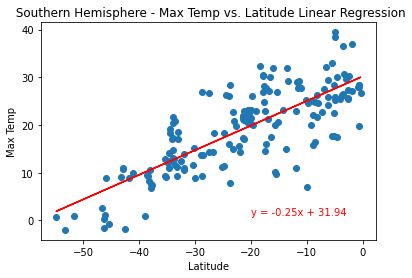

In [66]:
#plot
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,'r-')
plt.title(' Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-20,1), color='red')


#plt.savefig('output_data/south_lat_vs_temp.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [79]:
x_values3 = north['Lat']
y_values3 = north['Humidity']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)

regress_values3 = x_values3 * slope + intercept

##

line_eq3 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')


The r-value is: 0.0014373162336217275


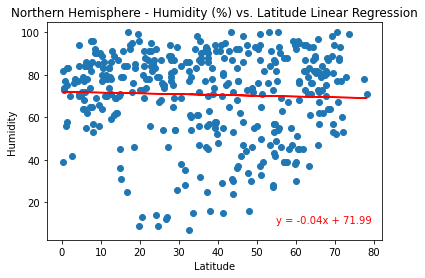

In [80]:
#plot
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,'r-')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq3,(55,10), color='red')


plt.savefig('output_data/north_lat_vs_humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [81]:
x_values4 = south['Lat']
y_values4 = south['Humidity']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)

regress_values4 = x_values4 * slope + intercept

##

line_eq4 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.06962884224057904


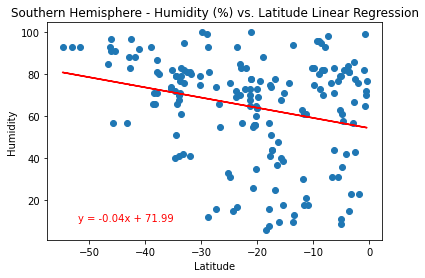

In [98]:
#plot
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,'r-')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq3,(-52,10), color='red')


#plt.savefig('output_data/south_lat_vs_humidity.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [84]:
x_values5 = north['Lat']
y_values5 = north['Cloudiness']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)

regress_values5 = x_values5 * slope + intercept

##

line_eq5 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')

The r-value is: 1.8305190789141374e-05


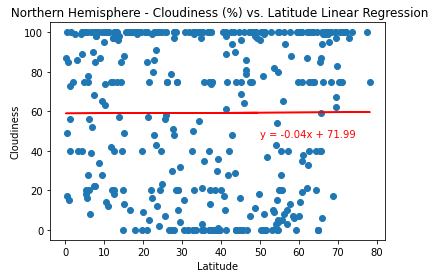

In [99]:
#plot
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5,'r-')
plt.title(' Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq3,(50,47), color='red')


#plt.savefig('output_data/north_lat_vs_cloudiness.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [88]:
x_values6 = south['Lat']
y_values6 = south['Cloudiness']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)

regress_values6 = x_values6 * slope + intercept

##

line_eq6 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.011938029626229276


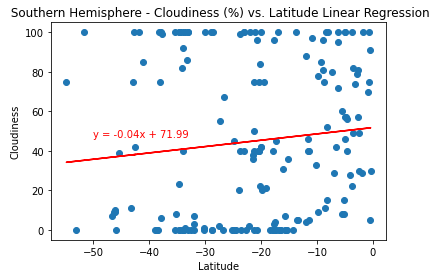

In [100]:
#plot
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6,'r-')
plt.title(' Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq3,(-50,47), color='red')


#plt.savefig('output_data/south_lat_vs_cloudiness.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [90]:
x_values7 = north['Lat']
y_values7 = north['Windspeed']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)

regress_values7 = x_values7 * slope + intercept

##

line_eq7 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.0011948535771163656


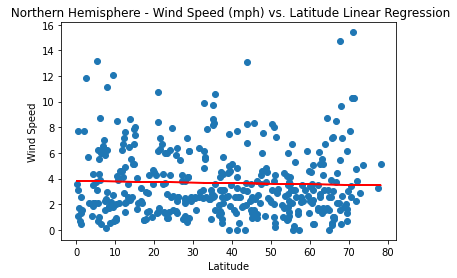

In [101]:
#plot
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7,'r-')
plt.title(' Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq3,(50,47), color='red')


#plt.savefig('output_data/north_lat_vs_windspeed.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [95]:
x_values8 = south['Lat']
y_values8 = south['Windspeed']

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)

regress_values8 = x_values8 * slope + intercept

##

line_eq8 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#r value
print(f'The r-value is: {rvalue**2}')

The r-value is: 4.323391498470917e-05


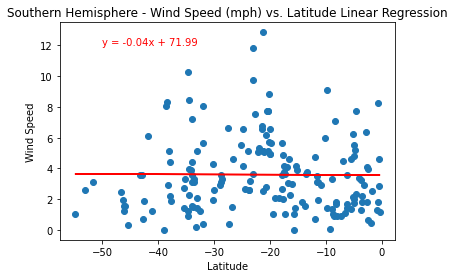

In [102]:
#plot
plt.scatter(x_values8,y_values8)
plt.plot(x_values8,regress_values8,'r-')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq3,(-50,12), color='red')


#plt.savefig('output_data/south_lat_vs_windspeed.png')

plt.show()

In [ ]:
## Observation Trends
# 1.) With the temp graphs you can see the temperature decrease as you move away from the equator and increases as you get closer. Therefore it is hotter near the equator
# 2.) There is no relationship of Cloudiness whether you move away from the equator or move closer
# 3.) There is no relationship of Windspeed whether you move away from the equator or move closer